## Initial imports

In [1]:
from scm.plams import plot_molecule, from_smiles, Molecule
from scm.plams.interfaces.molecule.packmol import packmol
from ase.visualize.plot import plot_atoms
from ase.build import fcc111, bulk
import matplotlib.pyplot as plt
from scm.version import release

AMS2025 = release >= "2024.201"
AMS2026 = release >= "2025.201"
if AMS2025:
    from scm.plams import packmol_around

## Helper functions

In [2]:
def printsummary(mol, details=None):
    if details:
        density = details["density"]
    else:
        density = mol.get_density() * 1e-3
    s = f"{len(mol)} atoms, density = {density:.3f} g/cm^3"
    if mol.lattice:
        s += f", box = {mol.lattice[0][0]:.3f}, {mol.lattice[1][1]:.3f}, {mol.lattice[2][2]:.3f}"
    s += f", formula = {mol.get_formula()}"
    if details:
        s += f'\n#added molecules per species: {details["n_molecules"]}, mole fractions: {details["mole_fractions"]}'
    print(s)

## Liquid water (fluid with 1 component)
First, create the gasphase molecule:

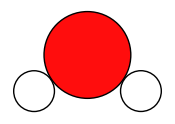

In [3]:
water = from_smiles("O")
plot_molecule(water);

pure liquid from approximate number of atoms and exact density (in g/cm^3), cubic box with auto-determined size
195 atoms, density = 1.000 g/cm^3, box = 12.482, 12.482, 12.482, formula = H130O65


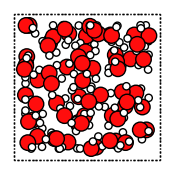

In [4]:
print("pure liquid from approximate number of atoms and exact density (in g/cm^3), cubic box with auto-determined size")
out = packmol(water, n_atoms=194, density=1.0)
printsummary(out)
out.write("water-1.xyz")
plot_molecule(out);

pure liquid from approximate density (in g/cm^3) and an orthorhombic box
135 atoms, density = 1.002 g/cm^3, box = 8.000, 12.000, 14.000, formula = H90O45


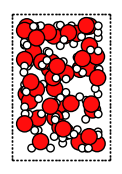

In [5]:
print("pure liquid from approximate density (in g/cm^3) and an orthorhombic box")
out = packmol(water, density=1.0, box_bounds=[0.0, 0.0, 0.0, 8.0, 12.0, 14.0])
printsummary(out)
out.write("water-2.xyz")
plot_molecule(out);

pure liquid with explicit number of molecules and exact density
192 atoms, density = 1.000 g/cm^3, box = 12.417, 12.417, 12.417, formula = H128O64


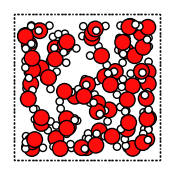

In [6]:
print("pure liquid with explicit number of molecules and exact density")
out = packmol(water, n_molecules=64, density=1.0)
printsummary(out)
out.write("water-3.xyz")
plot_molecule(out);

pure liquid with explicit number of molecules and box
192 atoms, density = 0.877 g/cm^3, box = 12.000, 13.000, 14.000, formula = H128O64


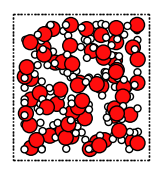

In [7]:
print("pure liquid with explicit number of molecules and box")
out = packmol(water, n_molecules=64, box_bounds=[0.0, 0.0, 0.0, 12.0, 13.0, 14.0])
printsummary(out)
out.write("water-4.xyz")
plot_molecule(out);

water-5.xyz: pure liquid in non-orthorhombic box (requires AMS2025 or later)
NOTE: Non-orthorhombic boxes may yield inaccurate results, always carefully check the output


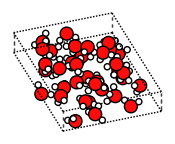

In [8]:
if AMS2025:
    print("water-5.xyz: pure liquid in non-orthorhombic box (requires AMS2025 or later)")
    print("NOTE: Non-orthorhombic boxes may yield inaccurate results, always carefully check the output")
    # You can pack inside any lattice using the packmol_around function
    box = Molecule()
    box.lattice = [[10.0, 2.0, -1.0], [-5.0, 8.0, 0.0], [0.0, -2.0, 11.0]]
    out = packmol_around(box, molecules=[water], n_molecules=[32])
    out.write("water-5.xyz")
    plot_molecule(out);

Experimental feature (AMS2025): guess density for pure liquid
Note: This density is meant to be equilibrated with NPT MD. It can be very inaccurate!
Guessed density: 1013.97 kg/m^3


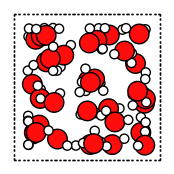

In [9]:
if AMS2025:
    print("Experimental feature (AMS2025): guess density for pure liquid")
    print("Note: This density is meant to be equilibrated with NPT MD. It can be very inaccurate!")
    out = packmol(water, n_atoms=100)
    print(f"Guessed density: {out.get_density():.2f} kg/m^3")
    plot_molecule(out);

## Water-acetonitrile mixture (fluid with 2 or more components)
Let's also create a single acetonitrile molecule:

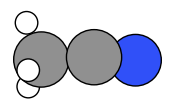

In [10]:
acetonitrile = from_smiles("CC#N")
plot_molecule(acetonitrile);

Set the desired mole fractions and density. Here, the density is calculated as the weighted average of water (1.0 g/cm^3) and acetonitrile (0.76 g/cm^3) densities, but you could use any other density.

In [11]:
# MIXTURES
x_water = 0.666  # mole fraction
x_acetonitrile = 1 - x_water  # mole fraction
# weighted average of pure component densities
density = (x_water * 1.0 + x_acetonitrile * 0.76) / (x_water + x_acetonitrile)

print("MIXTURES")
print(f"x_water = {x_water:.3f}")
print(f"x_acetonitrile = {x_acetonitrile:.3f}")
print(f"target density = {density:.3f} g/cm^3")

MIXTURES
x_water = 0.666
x_acetonitrile = 0.334
target density = 0.920 g/cm^3


By setting ``return_details=True``, you can get information about the mole fractions of the returned system. They may not exactly match the mole fractions you put in.

2-1 water-acetonitrile from approximate number of atoms and exact density (in g/cm^3), cubic box with auto-determined size
201 atoms, density = 0.920 g/cm^3, box = 13.263, 13.263, 13.263, formula = C34H117N17O33
#added molecules per species: [33, 17], mole fractions: [0.66, 0.34]


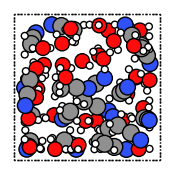

In [12]:
print(
    "2-1 water-acetonitrile from approximate number of atoms and exact density (in g/cm^3), "
    "cubic box with auto-determined size"
)
out, details = packmol(
    molecules=[water, acetonitrile],
    mole_fractions=[x_water, x_acetonitrile],
    n_atoms=200,
    density=density,
    return_details=True,
)
printsummary(out, details)
out.write("water-acetonitrile-1.xyz")
plot_molecule(out);

The ``details`` is a dictionary as follows:

In [13]:
for k, v in details.items():
    print(f"{k}: {v}")

n_molecules: [33, 17]
mole_fractions: [0.66, 0.34]
n_atoms: 201
molecule_type_indices: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
molecule_indices: [0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 7, 7, 7, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 16, 16, 16, 17, 17, 17, 18, 18, 18, 19, 19, 19, 20, 20, 20, 21, 21, 21, 22, 22, 22, 23, 23, 23, 24, 24, 24, 25, 25, 25, 26, 26, 

2-1 water-acetonitrile from approximate density (in g/cm^3) and box bounds
201 atoms, density = 0.933 g/cm^3, box = 13.200, 13.200, 13.200, formula = C34H117N17O33
#added molecules per species: [33, 17], mole fractions: [0.66, 0.34]


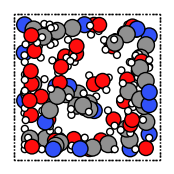

In [14]:
print("2-1 water-acetonitrile from approximate density (in g/cm^3) and box bounds")
out, details = packmol(
    molecules=[water, acetonitrile],
    mole_fractions=[x_water, x_acetonitrile],
    box_bounds=[0, 0, 0, 13.2, 13.2, 13.2],
    density=density,
    return_details=True,
)
printsummary(out, details)
out.write("water-acetonitrile-2.xyz")
plot_molecule(out);

2-1 water-acetonitrile from explicit number of molecules and density, cubic box with auto-determined size
192 atoms, density = 0.920 g/cm^3, box = 13.058, 13.058, 13.058, formula = C32H112N16O32
#added molecules per species: [32, 16], mole fractions: [0.6666666666666666, 0.3333333333333333]


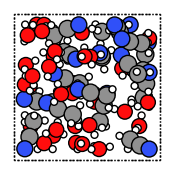

In [15]:
print("2-1 water-acetonitrile from explicit number of molecules and density, cubic box with auto-determined size")
out, details = packmol(
    molecules=[water, acetonitrile],
    n_molecules=[32, 16],
    density=density,
    return_details=True,
)
printsummary(out, details)
out.write("water-acetonitrile-3.xyz")
plot_molecule(out);

2-1 water-acetonitrile from explicit number of molecules and box
192 atoms, density = 0.890 g/cm^3, box = 13.200, 13.200, 13.200, formula = C32H112N16O32


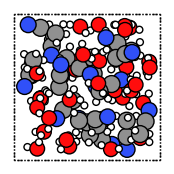

In [16]:
print("2-1 water-acetonitrile from explicit number of molecules and box")
out = packmol(
    molecules=[water, acetonitrile],
    n_molecules=[32, 16],
    box_bounds=[0, 0, 0, 13.2, 13.2, 13.2],
)
printsummary(out)
out.write("water-acetonitrile-4.xyz")
plot_molecule(out);

Experimental feature (AMS2025): guess density for mixture
Note: This density is meant to be equilibrated with NPT MD. It can be very inaccurate!
Guessed density: 849.35 kg/m^3


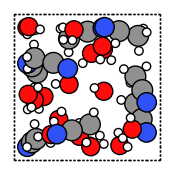

In [17]:
if AMS2025:
    print("Experimental feature (AMS2025): guess density for mixture")
    print("Note: This density is meant to be equilibrated with NPT MD. It can be very inaccurate!")
    out = packmol([water, acetonitrile], mole_fractions=[x_water, x_acetonitrile], n_atoms=100)
    print(f"Guessed density: {out.get_density():.2f} kg/m^3")
    plot_molecule(out);

## NaCl solution (solvent with 1 or more solutes)

In [18]:
sodium = from_smiles("[Na+]")
chloride = from_smiles("[Cl-]")

For dilute solutions, it can be useful to specify the number of solute species, and fill up the rest of the box with solvent.

The required number of solvent molecules are then added to fill up the box to the target overall density or number of atoms.

This feature can be used if exactly **one** of the elements of the ``n_molecules`` list is None.

NaCl solution from approximate density (in g/cm^3) and box bounds, and auto-determined number of solvent molecules
670 atoms, density = 1.030 g/cm^3, box = 19.000, 19.000, 19.000, formula = Cl5H440Na5O220


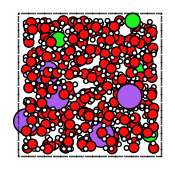

In [19]:
if AMS2026:
    print(
        "NaCl solution from approximate density (in g/cm^3) and box bounds, and auto-determined number of solvent molecules"
    )
    out = packmol([sodium, chloride, water], n_molecules=[5, 5, None], density=1.029, box_bounds=[0, 0, 0, 19, 19, 19])
    printsummary(out)
    out.write("sodium-chloride-solution-1.xyz")
    plot_molecule(out);

Specify the total number of atoms instead of box bounds, and auto-determine a cubic box:

NaCl solution from approximate number of atoms and density:
499 atoms, density = 1.029 g/cm^3, box = 17.336, 17.336, 17.336, formula = Cl5H326Na5O163


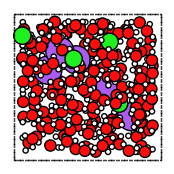

In [20]:
if AMS2026:
    print("NaCl solution from approximate number of atoms and density:")
    out = packmol([sodium, chloride, water], n_molecules=[5, 5, None], density=1.029, n_atoms=500)
    printsummary(out)
    out.write("sodium-chloride-solution-2.xyz")
    plot_molecule(out);

Specify the total number of atoms instead of the density (less useful option):

NaCl solution from approximate number of atoms and box_bounds:
499 atoms, density = 1.034 g/cm^3, box = 12.000, 18.000, 24.000, formula = Cl5H326Na5O163


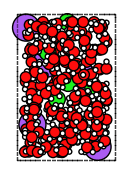

In [21]:
if AMS2026:
    print("NaCl solution from approximate number of atoms and box_bounds:")
    out = packmol([sodium, chloride, water], n_molecules=[5, 5, None], n_atoms=500, box_bounds=[0, 0, 0, 12, 18, 24])
    printsummary(out)
    out.write("sodium-chloride-solution-3.xyz")
    plot_molecule(out);

## Pack inside sphere

Set ``sphere=True`` to pack in a sphere (non-periodic) instead of in a periodic box. The sphere will be centered near the origin.

water in a sphere from exact density and number of molecules
300 atoms, density = 1.000 g/cm^3, formula = H200O100
#added molecules per species: [100], mole fractions: [1.0]
Radius  of sphere: 8.939 ang.
Center of mass xyz (ang): (0.15768025309228317, 0.12207103040257866, 0.3250874654186094)


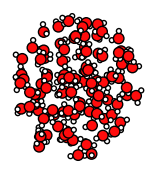

In [22]:
print("water in a sphere from exact density and number of molecules")
out, details = packmol(molecules=[water], n_molecules=[100], density=1.0, return_details=True, sphere=True)
printsummary(out, details)
print(f"Radius  of sphere: {details['radius']:.3f} ang.")
print(f"Center of mass xyz (ang): {out.get_center_of_mass()}")
out.write("water-sphere.xyz")
plot_molecule(out);

2-1 water-acetonitrile in a sphere from exact density (in g/cm^3) and approximate number of atoms and mole fractions
501 atoms, density = 0.920 g/cm^3, formula = C84H292N42O83
#added molecules per species: [83, 42], mole fractions: [0.664, 0.336]


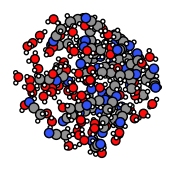

In [23]:
print(
    "2-1 water-acetonitrile in a sphere from exact density (in g/cm^3) and "
    "approximate number of atoms and mole fractions"
)
out, details = packmol(
    molecules=[water, acetonitrile],
    mole_fractions=[x_water, x_acetonitrile],
    n_atoms=500,
    density=density,
    return_details=True,
    sphere=True,
)
printsummary(out, details)
out.write("water-acetonitrile-sphere.xyz")
plot_molecule(out);

## Packing ions, total system charge

The total system charge will be sum of the charges of the constituent molecules.

In PLAMS, ``molecule.properties.charge`` specifies the charge:

3 water molecules, 3 ammonium, 1 chloride (non-periodic)
Initial charges:
Water: 0
Ammonium: 1
Chloride: -1
Total charge of packmol-generated system: 2


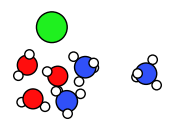

In [24]:
ammonium = from_smiles("[NH4+]")  # ammonia.properties.charge == +1
chloride = from_smiles("[Cl-]")  # chloride.properties.charge == -1
print("3 water molecules, 3 ammonium, 1 chloride (non-periodic)")
print("Initial charges:")
print(f"Water: {water.properties.get('charge', 0)}")
print(f"Ammonium: {ammonium.properties.get('charge', 0)}")
print(f"Chloride: {chloride.properties.get('charge', 0)}")
out = packmol(molecules=[water, ammonium, chloride], n_molecules=[3, 3, 1], density=0.4, sphere=True)
tot_charge = out.properties.get("charge", 0)
print(f"Total charge of packmol-generated system: {tot_charge}")
out.write("water-ammonium-chloride.xyz")
plot_molecule(out);

## Microsolvation
``packmol_microsolvation`` can create a microsolvation sphere around a solute.

Microsolvated structure: 81 atoms.


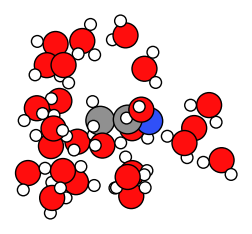

In [25]:
from scm.plams import packmol_microsolvation

out = packmol_microsolvation(solute=acetonitrile, solvent=water, density=1.5, threshold=4.0)
# for microsolvation it's a good idea to have a higher density than normal to get enough solvent molecules
print(f"Microsolvated structure: {len(out)} atoms.")
out.write("acetonitrile-microsolvated.xyz")

figsize = (3, 3)
plot_molecule(out, figsize=figsize);

## Solid-liquid or solid-gas interfaces
First, create a slab using the ASE ``fcc111`` function

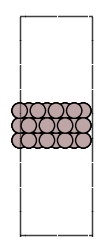

In [26]:
from scm.plams import plot_molecule, fromASE
from ase.build import fcc111

rotation = "90x,0y,0z"  # sideview of slab
slab = fromASE(fcc111("Al", size=(4, 6, 3), vacuum=15.0, orthogonal=True, periodic=True))
plot_molecule(slab, figsize=figsize, rotation=rotation);

water surrounding an Al slab, from an approximate density
534 atoms, density = 1.325 g/cm^3, box = 11.455, 14.881, 34.677, formula = Al72H308O154


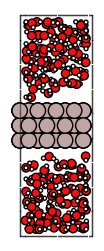

In [27]:
print("water surrounding an Al slab, from an approximate density")
if AMS2025:
    out = packmol_around(slab, water, density=1.0)
    printsummary(out)
    out.write("al-water-pure.xyz")
    plot_molecule(out, figsize=figsize, rotation=rotation);

2-1 water-acetonitrile mixture surrounding an Al slab, from mole fractions and an approximate density
468 atoms, density = 1.260 g/cm^3, box = 11.455, 14.881, 34.677, formula = C66H231Al72N33O66


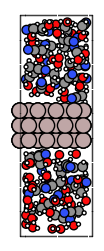

In [28]:
print("2-1 water-acetonitrile mixture surrounding an Al slab, from mole fractions and an approximate density")
if AMS2025:
    out = packmol_around(slab, [water, acetonitrile], mole_fractions=[x_water, x_acetonitrile], density=density)
    printsummary(out)
    out.write("al-water-acetonitrile.xyz")
    plot_molecule(out, figsize=figsize, rotation=rotation);

water surrounding non-orthorhombic Au(211) slab, from an approximate number of molecules
NOTE: non-orthorhombic cell, results are approximate, requires AMS2025
out.lattice=[(9.1231573482, 0.0, 0.0), (3.6492629392999993, 4.4694160692, 0.0), (0.0, 0.0, 31.161091638)]


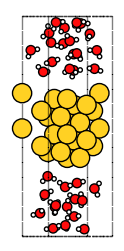

In [29]:
from ase.build import surface

if AMS2025:
    print("water surrounding non-orthorhombic Au(211) slab, from an approximate number of molecules")
    print("NOTE: non-orthorhombic cell, results are approximate, requires AMS2025")
    slab = surface("Au", (2, 1, 1), 6)
    slab.center(vacuum=11.0, axis=2)
    slab.set_pbc(True)
    out = packmol_around(fromASE(slab), [water], n_molecules=[32], tolerance=1.8)
    out.write("Au211-water.xyz")
    plot_molecule(out, figsize=figsize, rotation=rotation)
    print(f"{out.lattice=}")

## Pack inside voids in crystals

Use the ``packmol_around`` function. You can decrease ``tolerance`` if you need to pack very tightly. The default value for ``tolerance`` is 2.0.

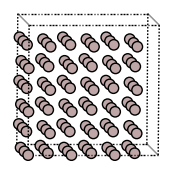

In [30]:
from scm.plams import fromASE
from ase.build import bulk

bulk_Al = fromASE(bulk("Al", cubic=True).repeat((3, 3, 3)))
rotation = "-85x,5y,0z"
plot_molecule(bulk_Al, rotation=rotation, radii=0.4);

178 atoms, density = 2.819 g/cm^3, box = 12.150, 12.150, 12.150, formula = Al108H50He20


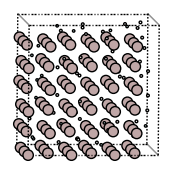

In [31]:
if AMS2025:
    out = packmol_around(
        current=bulk_Al,
        molecules=[from_smiles("[H]"), from_smiles("[He]")],
        n_molecules=[50, 20],
        tolerance=1.5,
    )
    plot_molecule(out, rotation=rotation, radii=0.4)
    printsummary(out)
    out.write("al-bulk-with-h-he.xyz")

## Bonds, atom properties (force field types, regions, ...)

The ``packmol()`` function accepts the arguments ``keep_bonds`` and ``keep_atom_properties``. These options will keep the bonds defined for the constitutent molecules, as well as any atomic properties.

The bonds and atom properties are easiest to see by printing the System block for an AMS job:

In [32]:
from scm.plams import Settings

water = from_smiles("O")
n2 = from_smiles("N#N")

# delete properties coming from from_smiles
for at in water:
    at.properties = Settings()
for at in n2:
    at.properties = Settings()

water[1].properties.region = "oxygen_atom"
water[2].properties.mass = 2.014  # deuterium
water.delete_bond(water[1, 2])  # delete bond between atoms 1 and 2 (O and H)

In [33]:
from scm.plams import AMSJob

out = packmol([water, n2], n_molecules=[2, 1], density=0.5)
print(AMSJob(molecule=out).get_input())

System
  Atoms
              O       1.0073590000       4.6111920000       1.1556130000 region=mol0,oxygen_atom
              H       1.9264970000       4.9227350000       1.0177500000 mass=2.014 region=mol0
              H       0.9519560000       3.6309390000       1.1714300000 region=mol0
              O       3.9981590000       3.6235460000       1.9874440000 region=mol0,oxygen_atom
              H       3.7804710000       4.5774810000       2.0465920000 mass=2.014 region=mol0
              H       3.1914180000       3.0678290000       1.9198970000 region=mol0
              N       4.5064270000       1.5136730000       1.0489100000 region=mol1
              N       4.9425390000       1.0458000000       1.9561140000 region=mol1
  End
  BondOrders
     1 3 1.0
     4 6 1.0
     7 8 3.0
  End
  Lattice
         5.9692549746     0.0000000000     0.0000000000
         0.0000000000     5.9692549746     0.0000000000
         0.0000000000     0.0000000000     5.9692549746
  End
End



By default, the ``packmol()`` function assigns regions called ``mol0``, ``mol1``, etc. to the different added molecules. The ``region_names`` option lets you set custom names. 

In [34]:
out = packmol(
    [water, n2],
    n_molecules=[2, 1],
    density=0.5,
    region_names=["water", "nitrogen_molecule"],
)
print(AMSJob(molecule=out).get_input())

System
  Atoms
              O       4.1821980000       4.8199630000       4.9840650000 region=oxygen_atom,water
              H       3.2100940000       4.9400980000       4.9458590000 mass=2.014 region=water
              H       4.4322650000       3.8711140000       5.0210560000 region=water
              O       4.1005690000       0.9966850000       1.1977600000 region=oxygen_atom,water
              H       3.2552230000       1.4532120000       1.0032060000 mass=2.014 region=water
              H       4.8447710000       1.6301390000       1.2932370000 region=water
              N       4.9754450000       4.9471000000       1.2166720000 region=nitrogen_molecule
              N       4.3981240000       4.0228800000       1.0053990000 region=nitrogen_molecule
  End
  BondOrders
     1 3 1.0
     4 6 1.0
     7 8 3.0
  End
  Lattice
         5.9692549746     0.0000000000     0.0000000000
         0.0000000000     5.9692549746     0.0000000000
         0.0000000000     0.0000000000   

Below, we also set ``keep_atom_properties=False``, this will remove the previous regions (in this example "oxygen_atom") and mass. 

In [35]:
out = packmol([water, n2], n_molecules=[2, 1], density=0.5, keep_atom_properties=False)
print(AMSJob(molecule=out).get_input())

System
  Atoms
              O       1.0696000000       4.2552160000       4.2995780000 region=mol0
              H       1.5028600000       4.9649360000       4.8186760000 region=mol0
              H       0.9999960000       3.4192530000       4.8100060000 region=mol0
              O       2.2086470000       4.3489730000       1.4785500000 region=mol0
              H       1.9773590000       3.3965390000       1.4944480000 region=mol0
              H       1.5012670000       4.8902510000       1.0652130000 region=mol0
              N       1.3553860000       0.9554440000       2.0478570000 region=mol1
              N       1.0007740000       1.2900360000       1.0506520000 region=mol1
  End
  BondOrders
     1 3 1.0
     4 6 1.0
     7 8 3.0
  End
  Lattice
         5.9692549746     0.0000000000     0.0000000000
         0.0000000000     5.9692549746     0.0000000000
         0.0000000000     0.0000000000     5.9692549746
  End
End



``keep_bonds=False`` will additionally ignore any defined bonds:

In [36]:
out = packmol(
    [water, n2],
    n_molecules=[2, 1],
    density=0.5,
    region_names=["water", "nitrogen_molecule"],
    keep_bonds=False,
    keep_atom_properties=False,
)
print(AMSJob(molecule=out).get_input())

System
  Atoms
              O       4.9676900000       1.2341540000       3.1521120000 region=water
              H       4.8067990000       1.0000040000       2.2139400000 region=water
              H       4.6654150000       2.1452960000       3.3586670000 region=water
              O       3.4268240000       2.5484480000       1.0031490000 region=water
              H       2.5912260000       3.0609470000       1.0030040000 region=water
              H       4.2150230000       3.1340530000       0.9982650000 region=water
              N       1.1505700000       1.0349320000       1.9922020000 region=nitrogen_molecule
              N       1.0418150000       1.4725760000       0.9779250000 region=nitrogen_molecule
  End
  Lattice
         5.9692549746     0.0000000000     0.0000000000
         0.0000000000     5.9692549746     0.0000000000
         0.0000000000     0.0000000000     5.9692549746
  End
End

